# 1.0 Imports

In [62]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# 2.0 Read CSV
**Nesta etapa, o arquivo csv é lido e atribuido à classe pandas. Também utilizo a função head() para me ajudar a enxergar como os dados estão dispostos, com isso posso gerar ideias de como fazer a próxima etapa.**

In [63]:
dir_path = os.path.dirname(os.path.abspath(''))
csv_path = os.path.join(dir_path,'dataset','teste_indicium_precificacao.csv')
data_frame = pd.read_csv(csv_path)
data_frame.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


# 3.0 Functions

In [169]:
def outliers_identification(df, coluna):
    """
        função que recebe um data frame e uma coluna no formato string e retorna um dataframe com duas colunas, 
        uma contendo os outliers inferiores e a outra os inferiores
    """
    quartil_1 = df[coluna].quantile(0.25)
    quartil_2 = df[coluna].quantile(0.50)
    quartil_3 = df[coluna].quantile(0.75)
    intervalo_interquartil = quartil_3 - quartil_1
    limite_superior = quartil_3 + 1.5*intervalo_interquartil
    limite_inferior = quartil_1 - 1.5*intervalo_interquartil
    outliers = pd.DataFrame(columns=['inferior_outliers','superior_outliers'])
    outliers['inferior_outliers'] = df[df[coluna] < limite_inferior][coluna]
    outliers['superior_outliers'] = df[df[coluna] > limite_superior][coluna]
    return outliers

def plot_bar_specific(series, xlabel, ylabel, title, **kwargs):
    """
        função que recebe uma panda series, de onde será tirado o nome dos distritos e seus valores, xlabel diz
        o nome do eixo X para o plot, ylabel faz o mesmo que o xlabel só que para o eixo Y, title condiz com o 
        título do gráfico e o kwargs é para um caso específico. O caso específico é o plot do crescimento percentual.
    """
    if 'values' in kwargs:
        plt.figure(figsize=(8, 3.5), facecolor='lightgrey')
        distritos = series.index
        serie_value = kwargs['values']
        plt.bar(distritos, serie_value, zorder=3, color='purple')
        plt.grid(linestyle='-', zorder=0, alpha=1, color='skyblue')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.xticks(rotation=25)
        plt.show()
    else:
        plt.figure(figsize=(8, 3.5), facecolor='lightgrey')
        distritos = series.index
        serie_value = series.values
        plt.bar(distritos, serie_value, zorder=3, color='purple')
        plt.grid(linestyle='-', zorder=0, alpha=1, color='skyblue')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.xticks(rotation=25)
        plt.show()

# 4.0 Data Processing
**Após um vislumbre inicial dos dados, é importante aprofundar o exame para obter informações mais detalhadas sobre o DataFrame.**

**Ao examinar a quantidade de linhas, identificar valores ausentes e verificar os tipos de dados em cada coluna, consigo extrair insights valiosos que orientam as próximas etapas de limpeza e preparação dos dados.**

**É evidente que as colunas do dataframe não estão padronizadas, algumas com nome em inglês outras em português. Também é interessante organizar para que tudo fique padronizado, como a base de dados é de estabelecimentos de Nova York vou deixá-los todos em Inglês.**

**Também é interessante criar um nova coluna contendo o preço mínimo de hospedagem visto que há uma tabela de preço e outra de estadia mínima**

In [64]:
# print para saber as informações do data frame
print(data_frame.info())

# padronização dos nomes das colunas
# criação de um dict com a troca de nomes das colunas
colunas_renomeadas = {'nome':'name',
                      'bairro_group':'district',
                      'bairro':'neighborhood',
                      'minimo_noites':'minimum_nights',
                      'numero_de_reviews':'reviews_count',
                      'ultima_review':'last_review',
                      'reviews_por_mes':'monthly_reviews',
                      'calculado_host_listings_count':'calculated_host_listings_count',
                      'disponibilidade_365':'yearly_availability'}

data_frame.rename(columns=colunas_renomeadas, inplace=True)

# eliminação de valores vazios das colunas identificadas
for coluna in ['name', 'host_name', 'last_review', 'monthly_reviews']:
    data_frame.dropna(subset=[coluna], inplace=True)

# transformar coluna last_review em date time
data_frame['last_review'] = pd.to_datetime(data_frame['last_review'], format='%Y-%m-%d')

# criação de uma coluna chamada preço total que é o price multiplicado pela quantidade mínima de noites
data_frame['total_price'] = data_frame['price']*data_frame['minimum_nights']




# info do data frame após todos os processos
print(data_frame.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

# 5.0 Análises
**Esta etapa tem como intuito levantamento e validação de hipóteses**

## 5.1 Identificação de Hotéis 'Bons' e seus Outliers
**Considerando que hotéis bons são aqueles com pouca disponibilidade anual, tendo em vista que pela falta de agenda, muitas pessoas estão alugando, e uma quantidade de reviews significativa, nesta célula dedico um tempo para ir mais a fundo na coluna reviews_count.**

    Para não utilizar números arbitrários para a consideração positiva de hotéis, resolvi usar a média da quantidade de reviews e disponibilidade anual. Portanto, hotéis que apresentam disponibilidade abaixo da média e um número de reviews acima da média são considerados bons.

**Ao pegar o valor mínimo da coluna de reviews_count, é possível afirmar que houve ou não erro na inserção destes dados. Caso haja valores negativos, é logicamente errado existir um estabelecimento com quantidade de reviews negativa e sabendo disso providências serão tomadas. Para este caso não houve valores negativos**


Quantidade mínima de reviews: 1
Média do número de reviews: 29.29
Mediana: 9.0
Percentual de outliers superior: 6.20%


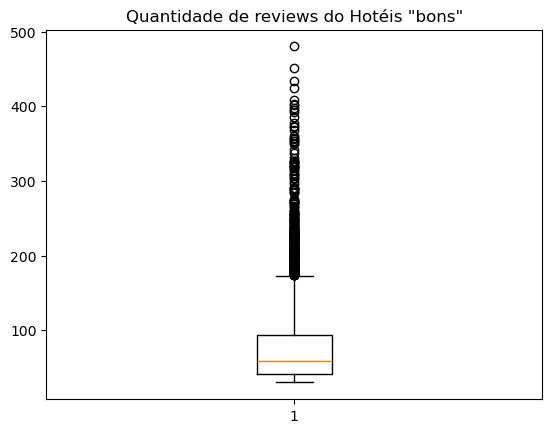

,name,price,minimum_nights,reviews_count,yearly_availability
5,BlissArtsSpace!,60,45,49,0
7,Cozy Clean Guest Room - Family Apt,79,2,118,0
9,Beautiful 1br on Upper West Side,135,5,53,6
10,Central Manhattan/near Broadway,85,2,188,39
14,Only 2 stops to Manhattan studio,140,2,148,46
...,...,...,...,...,...
42664,Queens Studio.,55,2,37,6
42941,Lucio's Room #3 a unos minutos del JFK y LGA,75,1,31,89
43138,Comfortable Room with Private Bath - 15 min to...,50,1,34,61
43790,NYC High End Upper East Side Central Park Gem ...,151,1,30,42


In [99]:
# mínimo, média e mediana da reviews_count. O mínimo aponta se há erro na inserção, caso haja valor negativo.
minimo_numero_reviews = data_frame['reviews_count'].min()
media_numero_reviews = data_frame['reviews_count'].mean()
mediana_numero_review = data_frame['reviews_count'].median()

media_disponibilidade = data_frame['yearly_availability'].mean()
print(f'Quantidade mínima de reviews: {minimo_numero_reviews}\nMédia do número de reviews: {media_numero_reviews:.2f}\nMediana: {mediana_numero_review}')

df_disponibilidade_abaixo_media = data_frame[data_frame['yearly_availability'] < media_disponibilidade]

df_lugares_bons_de_alugar = df_disponibilidade_abaixo_media[df_disponibilidade_abaixo_media['reviews_count'] > media_numero_reviews]
df_lugares_bons_de_alugar = df_lugares_bons_de_alugar[['name','price','minimum_nights','reviews_count','yearly_availability']]

# identificando outliers
df = outliers_identification(df_lugares_bons_de_alugar,'reviews_count')
quantidade_de_outliers_superior = df['superior_outliers'].shape[0]
quantidade_total_de_dados = df_lugares_bons_de_alugar['reviews_count'].shape[0]
percentual_de_outliers_superior = (quantidade_de_outliers_superior/quantidade_total_de_dados)*100
print(f'Percentual de outliers superior: {percentual_de_outliers_superior:.2f}%')

plt.boxplot(df_lugares_bons_de_alugar['reviews_count'])
plt.title('Quantidade de reviews do Hotéis "bons"')
plt.show()

df_lugares_bons_de_alugar

# 5.2 Hipóteses e Validações sobre Preços e Distritos

**Hipótese Inicial:**  
Após visualizar os dados deste DataFrame, surgiu-me uma hipótese: os distritos mais populosos de Nova York são os mais baratos para se alugar. Para validar essa ideia, realizei uma breve pesquisa na Internet sobre as populações desses distritos entre os anos de 2011 e 2019. Escolhi essas datas porque a coluna de datas do dataset varia de **2011-03-28** (a menor data) a **2019-07-08** (a maior data).

### População dos Distritos de Nova York (2011–2019)

| Ano   | Manhattan   | Brooklyn    | Queens      | Bronx       | Staten Island |
|-------|-------------|-------------|-------------|-------------|---------------|
| 2011  | 1.605.000   | 2.565.000   | 2.275.000   | 1.395.000   | 470.000       |
| 2012  | 1.630.000   | 2.580.000   | 2.490.000   | 1.496.000   | 475.000       |
| 2013  | 1.635.000   | 2.595.000   | 2.305.000   | 1.415.000   | 480.000       |
| 2014  | 1.650.000   | 2.610.000   | 2.320.000   | 1.425.000   | 485.000       |
| 2015  | 1.465.000   | 2.625.000   | 2.335.000   | 1.453.000   | 490.000       |
| 2016  | 1.680.000   | 2.640.000   | 2.350.000   | 1.445.000   | 495.000       |
| 2017  | 1.695.000   | 2.655.000   | 2.365.000   | 1.455.000   | 500.000       |
| 2018  | 1.710.000   | 2.670.000   | 2.390.000   | 1.465.000   | 505.000       |
| 2019  | 1.725.000   | 2.685.000   | 2.295.000   | 1.475.000   | 510.000       |

**Observação:**  
Apesar das oscilações nas populações ao longo dos anos, um fato persiste: **Brooklyn** é o distrito mais populoso, enquanto **Staten Island** é o menos populoso.

---

## Primeira Validação

**Objetivo:**  
Testar se a hipótese inicial está correta. Para isso, calculei a média dos preços das diárias e agrupei-os por distrito. Em seguida, criei um gráfico de barras com os distritos no eixo X e a média dos preços no eixo Y.

### Média dos Preços por Distrito

| Distrito       | Diária Média  | Ranqueamento |
|----------------|---------------|--------------|
| Bronx          | 79.558857     | 5            |
| Brooklyn       | 121.461613    | 2            |
| Manhattan      | 180.071596    | 1            |
| Queens         | 95.783683     | 3            |
| Staten Island  | 89.964968     | 4            |

**Conclusão:**  
Manhattan é o distrito mais caro, enquanto o Bronx é o mais barato. Portanto, a hipótese inicial estava **incorreta**.

---

## Segunda Hipótese

**Nova Hipótese:**  
O ranqueamento de preços se mantém quando consideramos o "preço real" (preço da diária multiplicado pelo número mínimo de noites necessárias). Para testar essa ideia, recalculei as médias utilizando o preço real.

### Preço Real Médio por Distrito

| Distrito       | Preço Real Médio | Ranqueamento |
|----------------|------------------|--------------|
| Bronx          | 289.017143       | 5            |
| Brooklyn       | 653.465872       | 2            |
| Manhattan      | 1328.286746      | 1            |
| Queens         | 579.924541       | 3            |
| Staten Island  | 311.729299       | 4            |

**Conclusão:**  
Manhattan continua sendo o distrito mais caro, e o Bronx permanece como o mais barato. O ranqueamento **não mudou** em relação à primeira validação.

---

## Análise do Crescimento Percentual

**Objetivo:**  
Calcular o aumento percentual médio do preço real em relação ao preço da diária para cada distrito.

### Crescimento Percentual por Distrito

| Distrito       | Crescimento Percentual (%) | Ranqueamento |
|----------------|----------------------------|--------------|
| Bronx          | 363.274629                 | 4            |
| Brooklyn       | 538.001969                 | 3            |
| Manhattan      | 737.643678                 | 1            |
| Queens         | 605.452328                 | 2            |
| Staten Island  | 346.500761                 | 5            |

**Conclusão Final:**  
Embora Manhattan tenha mantido sua posição como o distrito mais caro, o ranqueamento dos demais distritos mudou. O crescimento percentual revelou que **Manhattan** tem o maior aumento, seguido por **Queens**, **Brooklyn**, **Bronx** e **Staten Island**.

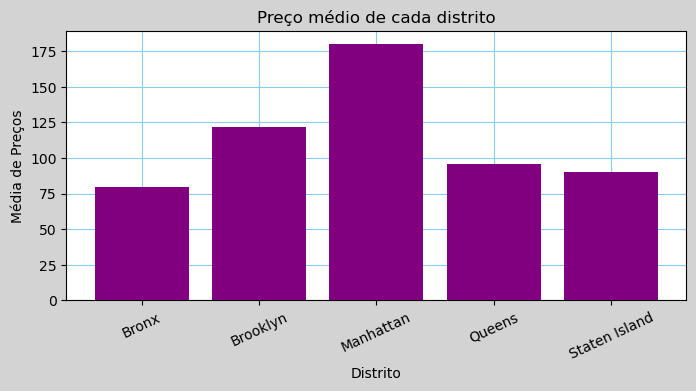

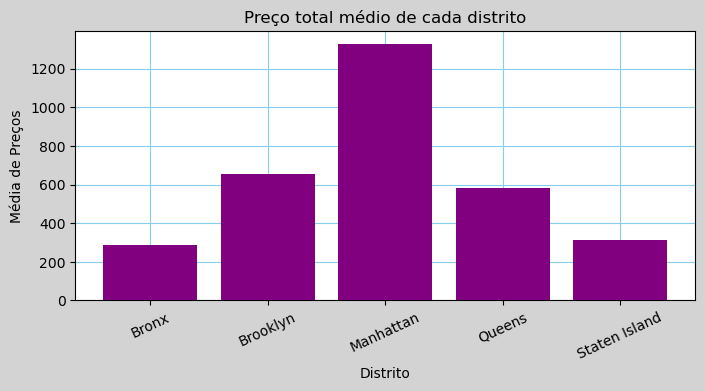

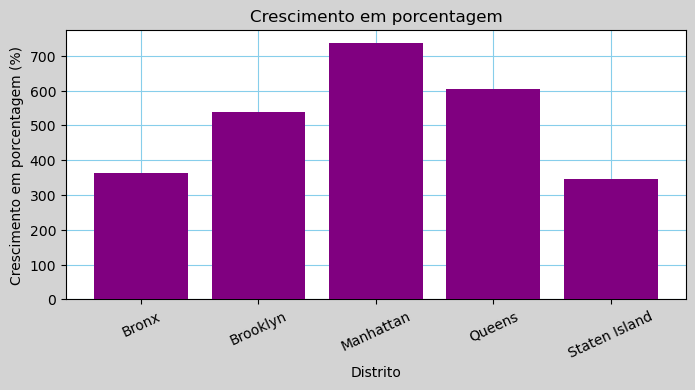

In [172]:
# calcular preço médio da diária e agrupar por distrito
df_preco_medio_por_distrito = data_frame.groupby('district')['price'].mean()

# chamada da função para a plotagem do gráfico de barras com as especificações do canvas
plot_bar_specific(df_preco_medio_por_distrito, 'Distrito', 'Média de Preços', 'Preço médio de cada distrito')

# calcular preço total médio e agrupar por distrito
df_preco_total_medio_por_distrito = data_frame.groupby('district')['total_price'].mean()

# chamada da função para a plotagem do gráfico de barras com as especificações do canvas
plot_bar_specific(df_preco_total_medio_por_distrito, 'Distrito', 'Média de Preços', 'Preço total médio de cada distrito')

# valores das médias armazenadas em arrays para calcular o crescimento percentual entre as duas
medias_por_distrito = df_preco_medio_por_distrito.values
medias_reais_por_distrito = df_preco_total_medio_por_distrito.values

# cálculo do percentual de crescimento preço_total/preço_diaria
for i in range(len(medias_reais_por_distrito)):
    percentual_crescimento = (medias_reais_por_distrito/medias_por_distrito)*100

# chamda da função para o caso específico com a utilização de kwargs
plot_bar_specific(df_preco_total_medio_por_distrito, 'Distrito', 'Crescimento em porcentagem (%)', 'Crescimento em porcentagem', values=percentual_crescimento)